## Install necessary libraries

In [ ]:
!pip3 install numpy
!pip3 install pandas
!pip3 install pyspark
!pip3 install kneed
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pydrive
!pip3 install gdown



## Loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import os

# Accessing the files from the shared folder
!gdown --folder https://drive.google.com/drive/folders/1ogyJ0yUBqcmK7FtqSmVVNyiNaAtXj2ab?usp=drive_link

# Directory containing CSV files in our Google Drive
directory = "/content/Training_Data/"

# # Directory containing CSV files in our Google Drive
# directory = "/content/drive/My Drive/Data_603_Project/Training_Data/"

# Wildcard pattern to search for files
pattern = "Wafer_*.csv"

# Read CSV files into Pandas DataFrames
df_list = []
for file_name in os.listdir(directory):
    if file_name.endswith(".csv") and file_name.startswith("Wafer_"):
        file_path = os.path.join(directory, file_name)
        df = pd.read_csv(file_path)
        # Add column name for the first column
        if df.columns[0] != "wafer_num":
            df.rename(columns={df.columns[0]: "wafer_num"}, inplace=True)
        df_list.append(df)
        print(f"Loaded file: {file_name}")

# Combine DataFrames into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True)

# Display the first 5 rows of the combined DataFrame
print(combined_df.head())


Loaded file: Wafer_15010_130532.csv
Loaded file: Wafer_07012020_000000.csv
Loaded file: Wafer_07012020_223345.csv
Loaded file: Wafer_08012020_120000.csv
Loaded file: Wafer_10012020_131534.csv
Loaded file: Wafer_11012020_151432.csv
Loaded file: Wafer_12012020_111.csv
Loaded file: Wafer_12012020_111213.csv
Loaded file: Wafer_13012020_141000.csv
Loaded file: Wafer_14012020_113045.csv
Loaded file: Wafer_15012020_130532.csv
Loaded file: Wafer_18012020_121532.csv
Loaded file: Wafer_19012020_141432.csv
Loaded file: Wafer_20012020_135132.csv
Loaded file: Wafer_20022020_090716.csv
Loaded file: Wafer_21012020_080913.csv
Loaded file: Wafer_21012020_143634.csv
Loaded file: Wafer_22012020_173245.csv
Loaded file: Wafer_22022020_041119.csv
Loaded file: Wafer_23012020_011008.csv
Loaded file: Wafer_23012020_041211.csv
Loaded file: Wafer_25012020_142112.csv
Loaded file: Wafer_27012020_080911.csv
Loaded file: Wafer_28012020_051011.csv
Loaded file: Wafer_28042020_031911.csv
Loaded file: Wafer_29012020_060

## Data Preprocessing

In [ ]:
# Drop the first column (Wafer_num) as it is just indicates the wafer number it has no influence on predictions.
combined_df = combined_df.iloc[:, 1:]


In [ ]:
X = combined_df.drop('good/bad', axis=1)
y = combined_df['good/bad']

In [ ]:
X.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,0.0069,...,NaN,NaN,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876
1,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,0.0189,...,NaN,NaN,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472
2,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,0.0090,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405
3,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.0081,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000
4,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,NaN,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000


## Check for null values in all the columns

In [ ]:
# Check for null values in the combined DataFrame
null_values = X.isnull().sum()

# Display the count of null values for each column
print("Null values per column:")
print(null_values)


Null values per column:
Sensor-1       8
Sensor-2      11
Sensor-3      14
Sensor-4      14
Sensor-5      14
              ..
Sensor-586     1
Sensor-587     0
Sensor-588     0
Sensor-589     0
Sensor-590     0
Length: 590, dtype: int64


# Get columns with string data type

In [ ]:
# Get columns with string data type
string_columns = X.select_dtypes(include=['object']).columns.tolist()
string_columns

['Sensor-332', 'Sensor-576', 'Sensor-586']

In [ ]:
# Convert string columns to float
import numpy as np

# Identify non-numeric values and replace with NaN
X = X.apply(pd.to_numeric, errors='coerce')



In [ ]:
X.head()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,0.0069,...,NaN,NaN,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876
1,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,0.0189,...,NaN,NaN,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472
2,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,0.0090,64.2405,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405
3,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.0081,0.0000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000
4,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,NaN,NaN,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000


## Imputing missing values with mean()

In [ ]:
## Imputing missing values with mean()

# Calculate the mean of each column
mean_values = X.mean()

# Fill null or NaN values with the mean of each column
X_filled = X.fillna(mean_values)

# Show filled DataFrame
X_filled.head()


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-581,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590
0,3002.22,2462.06,2202.1222,1833.3772,1.8005,100.0,95.8500,0.1242,1.5173,0.0069,...,0.007774,209.764894,0.5021,0.0071,0.0024,1.4182,0.0545,0.0184,0.0055,33.7876
1,3047.28,2186.06,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4619,0.0189,...,0.007774,209.764894,0.4998,0.0131,0.0033,2.6229,0.0222,0.0182,0.0060,81.9472
2,3076.81,2158.75,2208.2334,1517.0152,1.0980,100.0,110.1900,0.1247,1.4357,0.0089,...,0.009000,64.240500,0.5016,0.0152,0.0040,3.0319,0.0465,0.0299,0.0090,64.2405
3,2951.62,2511.92,2253.5111,1397.5060,0.9660,100.0,109.7611,0.1210,1.5527,0.0119,...,0.008100,0.000000,0.4953,0.0105,0.0037,2.1266,-0.0012,0.0252,0.0081,0.0000
4,2930.42,2505.17,2235.0556,1302.6607,1.6347,100.0,109.9856,0.1230,1.4588,-0.0143,...,0.007774,209.764894,0.4958,0.0111,0.0033,2.2296,-0.0012,0.0252,0.0081,0.0000


## Cross Check to confirm if any null values.

In [ ]:

# Check for null values in the combined DataFrame
null_values = X_filled.isnull().sum()

# Display the count of null values for each column
print("Null values per column:")
print(null_values)

Null values per column:
Sensor-1      0
Sensor-2      0
Sensor-3      0
Sensor-4      0
Sensor-5      0
             ..
Sensor-586    0
Sensor-587    0
Sensor-588    0
Sensor-589    0
Sensor-590    0
Length: 590, dtype: int64


## Outliers check.

plotting box plots to check the outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select 10 random columns
selected_columns = X_filled.sample(axis=1, n=10, random_state=42).columns

# Filter DataFrame to include only the selected columns
df_selected = X_filled[selected_columns]

# Create directory if it doesn't exist to save plots
output_dir = "/content/drive/My Drive/Data_603_Project/BoxPlots"
os.makedirs(output_dir, exist_ok=True)

# Create box plots for each selected numerical column and save them to Drive
for column in selected_columns:
    plt.figure(figsize=(6, 4))
    df_selected.boxplot(column=column)
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Values')
    plt.ylabel(column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    output_path = os.path.join(output_dir, f'{column}_boxplot.png')
    plt.savefig(output_path)
    plt.close()

print("Box plots saved successfully.")


Box plots saved successfully.


# We have identified some outliers so, we can handle those outliers using Winsorization technique

## Winsorization

Winsorization is a statistical technique used to deal with outliers in a dataset. It involves limiting extreme values in the data to a specified percentile (or percentage) of the data distribution. In other words, Winsorization replaces extreme values with less extreme ones, thereby reducing the impact of outliers on the analysis without removing them entirely.

For example, if we Winsorize a dataset at the 5th and 95th percentiles, any values below the 5th percentile are replaced with the value at the 5th percentile, and any values above the 95th percentile are replaced with the value at the 95th percentile.

Winsorization helps to make the data distribution more robust to outliers while preserving its overall shape and characteristics. It is commonly used in exploratory data analysis and in statistical modeling to improve the reliability of statistical estimates and inferences.


**Example:** Suppose we have the following dataset:

**original data: [10, 15, 20, 25, 30, 35, 40, 45, 50, 100]**

After Winsorization:

Replace values less than the 10th percentile (lower outliers) with the value at the 10th percentile. In this case, the 10th percentile is 15.
Replace values greater than the 90th percentile (upper outliers) with the value at the 90th percentile. In this case, the 90th percentile is 50.
So the Winsorized dataset would be:

**Winsorized dataset: [15, 15, 20, 25, 30, 35, 40, 45, 50, 50]**


In [ ]:
import numpy as np
from scipy.stats import mstats

# Get only numerical columns excluding the target column
numerical_columns = X_filled.select_dtypes(include=[np.number]).columns

# Winsorization
winsorized_X = X_filled.copy()
for col in numerical_columns:
    winsorized_X[col] = mstats.winsorize(winsorized_X[col], limits=[0.05, 0.05])

print("\nWinsorized DataFrame:")
print(winsorized_X.head())


Winsorized DataFrame:
   Sensor-1     Sensor-2   Sensor-3   Sensor-4  Sensor-5  Sensor-6  Sensor-7  \
0   3002.22  2462.060000  2202.1222  1833.3772    1.8005     100.0   95.8500   
1   3047.28  2260.793765  2235.0556  1302.6607    1.6347     100.0  109.9856   
2   3076.81  2260.793765  2208.2334  1517.0152    1.0980     100.0  110.1900   
3   2951.62  2511.920000  2253.5111  1397.5060    0.9660     100.0  109.7611   
4   2930.42  2505.170000  2235.0556  1302.6607    1.6347     100.0  109.9856   

   Sensor-8  Sensor-9  Sensor-10  ...  Sensor-581  Sensor-582  Sensor-583  \
0    0.1242    1.5173     0.0069  ...    0.007774  209.764894      0.5021   
1    0.1230    1.4619     0.0189  ...    0.007774  209.764894      0.4998   
2    0.1247    1.4357     0.0089  ...    0.009000   64.240500      0.5016   
3    0.1210    1.5527     0.0119  ...    0.008100   34.528367      0.4953   
4    0.1230    1.4588    -0.0143  ...    0.007774  209.764894      0.4958   

   Sensor-584  Sensor-585  Sensor

## Check the data before and after handling outliers. Here for example we are only considering Sensor-211

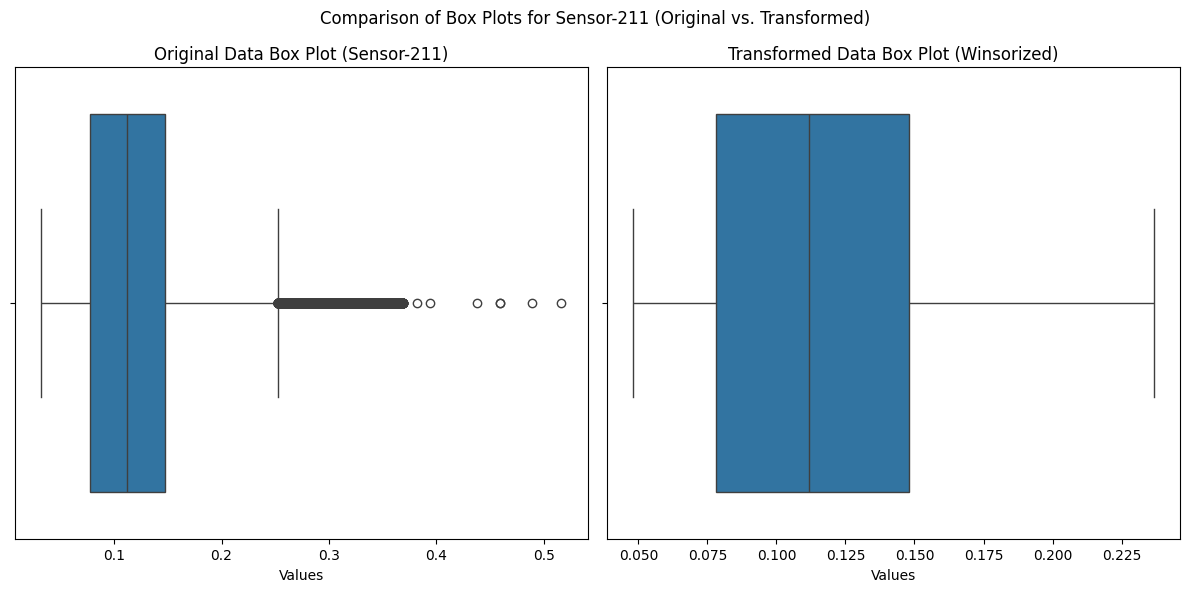

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mstats

# Create a figure and axis object
plt.figure(figsize=(12, 6))

# Master Title
plt.suptitle("Comparison of Box Plots for Sensor-211 (Original vs. Transformed)")

# Original Data Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(x=X_filled["Sensor-211"])
plt.title("Original Data Box Plot (Sensor-211)")
plt.xlabel("Values")

# Transformed Data Box Plot (Winsorized)
plt.subplot(1, 2, 2)
sns.boxplot(x=winsorized_X["Sensor-211"])
plt.title("Transformed Data Box Plot (Winsorized)")
plt.xlabel("Values")

plt.tight_layout()
plt.show()


## Checking the distribution of all the sensor data.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Assuming 'X_filled' is your Pandas DataFrame containing the variables of interest

# Select 10 random columns
selected_columns = X_filled.sample(axis=1, n=10, random_state=42).columns

# Filter DataFrame to include only the selected columns
df_selected = X_filled[selected_columns]

# Create directory if it doesn't exist to save plots
output_dir = "/content/drive/My Drive/Data_603_Project/Histograms"
os.makedirs(output_dir, exist_ok=True)

# Create histogram plots for each selected numerical column and save them to Drive
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(df_selected[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    output_path = os.path.join(output_dir, f'{column}_histogram.png')
    plt.savefig(output_path)
    plt.close()

print("Histogram plots saved successfully.")


Histogram plots saved successfully.


Data is not distributed equally and is having different scales for all sensor data. So we need to do standardization. We will perform it after train test split.

## Lets check the standard deviation on each sensor column

In [ ]:

# Calculate the standard deviation for each column
std_dev = winsorized_X.std()

# Identify columns with zero standard deviation
zero_std_columns = std_dev[std_dev == 0].index.tolist()

# Print the columns with zero standard deviation
print("Columns with zero standard deviation:")
print(zero_std_columns)
winsorized_X[zero_std_columns].head()


Columns with zero standard deviation:
['Sensor-6', 'Sensor-14', 'Sensor-43', 'Sensor-50', 'Sensor-53', 'Sensor-70', 'Sensor-98', 'Sensor-142', 'Sensor-150', 'Sensor-179', 'Sensor-180', 'Sensor-187', 'Sensor-190', 'Sensor-191', 'Sensor-192', 'Sensor-193', 'Sensor-194', 'Sensor-195', 'Sensor-227', 'Sensor-230', 'Sensor-231', 'Sensor-232', 'Sensor-233', 'Sensor-234', 'Sensor-235', 'Sensor-236', 'Sensor-237', 'Sensor-238', 'Sensor-241', 'Sensor-242', 'Sensor-243', 'Sensor-244', 'Sensor-257', 'Sensor-258', 'Sensor-259', 'Sensor-260', 'Sensor-261', 'Sensor-262', 'Sensor-263', 'Sensor-264', 'Sensor-265', 'Sensor-266', 'Sensor-267', 'Sensor-277', 'Sensor-285', 'Sensor-314', 'Sensor-315', 'Sensor-316', 'Sensor-323', 'Sensor-326', 'Sensor-327', 'Sensor-328', 'Sensor-329', 'Sensor-330', 'Sensor-331', 'Sensor-365', 'Sensor-370', 'Sensor-371', 'Sensor-372', 'Sensor-373', 'Sensor-374', 'Sensor-375', 'Sensor-376', 'Sensor-379', 'Sensor-380', 'Sensor-381', 'Sensor-382', 'Sensor-395', 'Sensor-396', 'Se

,Sensor-6,Sensor-14,Sensor-43,Sensor-50,Sensor-53,Sensor-70,Sensor-98,Sensor-142,Sensor-150,Sensor-179,...,Sensor-530,Sensor-531,Sensor-532,Sensor-533,Sensor-534,Sensor-535,Sensor-536,Sensor-537,Sensor-538,Sensor-539
0,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100.0,0.0,70.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Lets drop these columns as it is not having any valueable information for prediction as its standard deviation is 0.

In [ ]:
# Dropping these 116 columns with 0 standard deviation.
# Calculate standard deviation for each column
std_dev = winsorized_X.std()

# Find columns with zero standard deviation
zero_std_columns = std_dev[std_dev == 0].index

# Drop columns with zero standard deviation
winsorized_X.drop(columns=zero_std_columns, inplace=True)

print("Columns with zero standard deviation dropped successfully.")


Columns with zero standard deviation dropped successfully.


# Target class imbalance check.

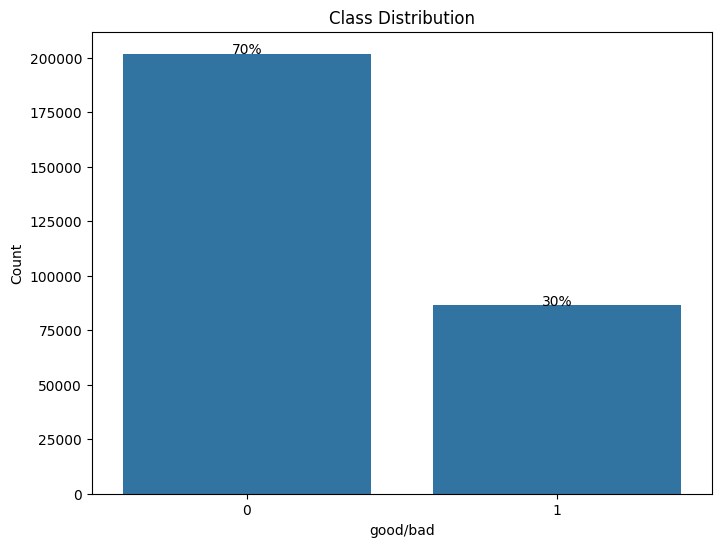

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the target variable
class_counts = combined_df['good/bad'].value_counts()

# Calculate the percentage of each class
total_samples = class_counts.sum()
class_percentages = (class_counts / total_samples) * 100

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('good/bad')
plt.ylabel('Count')

# Add percentage labels
for i, percentage in enumerate(class_percentages):
    plt.text(i, class_counts[i] + 10, f'{percentage:.0f}%', ha='center')

plt.show()


## Lets do standardization on the data and make the scale uniform for entire data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the  data and transform it
X_scaled = scaler.fit_transform(winsorized_X)

# # Transform the test data using the scaler fitted on the  data
# X_test_scaled = scaler.transform(X_test)


## Lets see how the data looks like after scaling.

In [ ]:
column_index = winsorized_X.columns.get_loc('Sensor-211')
print("Index of the column:", column_index)

Index of the column: 192


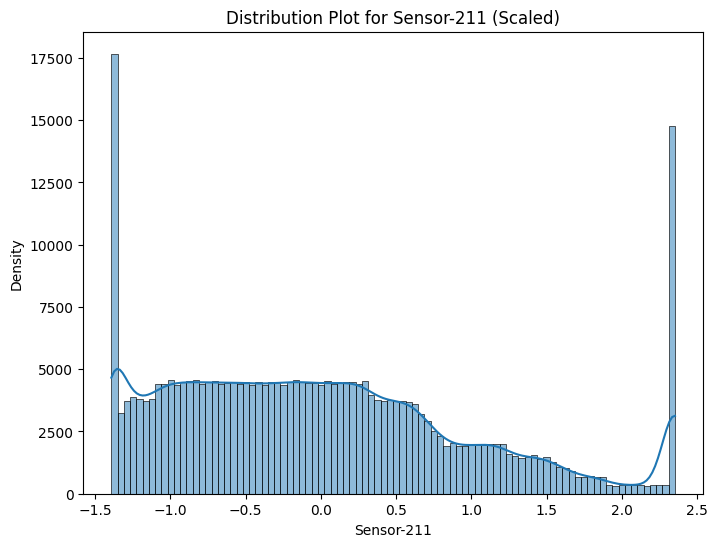

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Select the column index for SizeOfImage (assuming it's the first column, adjust as needed)
column_index = 192

# Extract the specified column from X_train_scaled
column_data = X_scaled[:, column_index]

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.histplot(column_data, kde=True)
plt.title('Distribution Plot for Sensor-211 (Scaled)')
plt.xlabel('Sensor-211')
plt.ylabel('Density')
plt.show()


# Lets do class balancing using SMOTE technique

In [ ]:
from imblearn.over_sampling import SMOTE
# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Resample the dataset
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


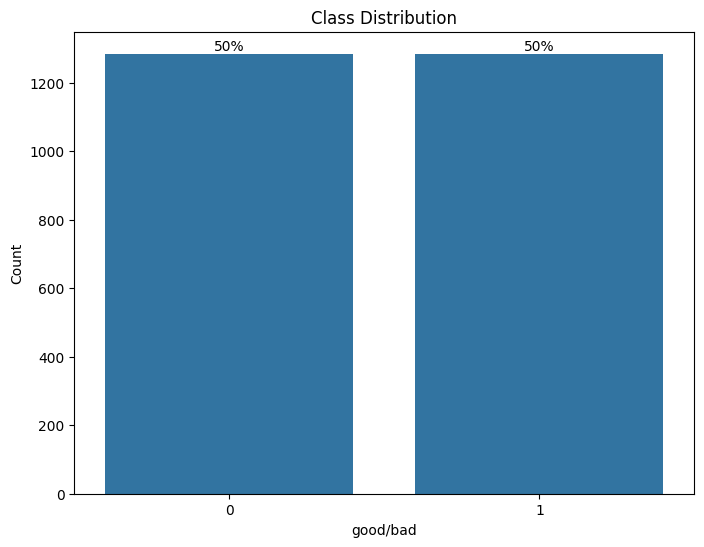

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each class in the target variable
class_counts = y_resampled.value_counts()

# Calculate the percentage of each class
total_samples = class_counts.sum()
class_percentages = (class_counts / total_samples) * 100

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution')
plt.xlabel('good/bad')
plt.ylabel('Count')

# Add percentage labels
for i, percentage in enumerate(class_percentages):
    plt.text(i, class_counts[i] + 10, f'{percentage:.0f}%', ha='center')

plt.show()


In [ ]:
# making sure we use this one final variables for all the model predictions

X_Final  = X_resampled
y_Final = y_resampled

## As we have around 590 columns and data size is huge. We will proceed with semi supervised learning method. So, at first we will implement K-means clustering and based on this we will group the data as per clusters and for each cluster we will perform supervised classification models and select the best fitted model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

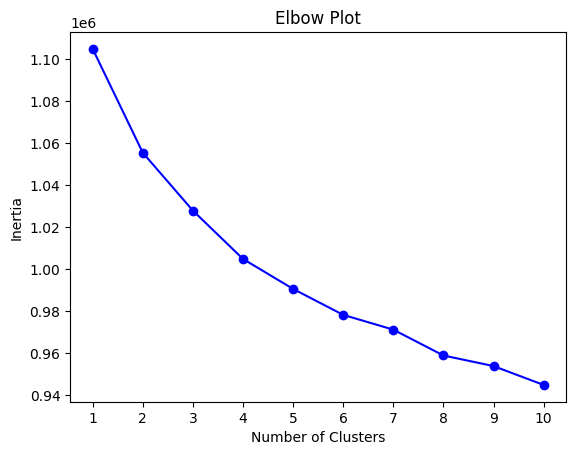

Optimal number of clusters based on the elbow method: 4


In [ ]:
from sklearn.cluster import KMeans
from kneed import KneeLocator
import matplotlib.pyplot as plt

# Define a range of cluster numbers to try
cluster_range = range(1, 11)  # You can adjust the range as needed

# Initialize list to store the within-cluster sum of squares (inertia) for each cluster number
inertia_values = []

# Fit KMeans with different numbers of clusters and calculate inertia
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_Final)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(cluster_range, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.xticks(cluster_range)
plt.show()

# Use KneeLocator to automatically find the number of clusters
knee = KneeLocator(cluster_range, inertia_values, curve='convex', direction='decreasing')
optimal_num_clusters = knee.elbow

print(f"Optimal number of clusters based on the elbow method: {optimal_num_clusters}")


In [ ]:
# Fit KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(X_Final)

# Convert X_train_Final to a DataFrame
X_Final_df = pd.DataFrame(X_Final, columns=winsorized_X.columns)

# Add cluster_num column to X_Final_df
X_Final_df['cluster_num'] = cluster_labels

# Now X_Final_df should have the cluster_num column
print(X_Final_df.head())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Sensor-1  Sensor-2  Sensor-3  Sensor-4  Sensor-5  Sensor-7  Sensor-8  \
0 -0.126858 -0.491853  0.084430  1.470497  1.320318 -1.094356  1.028379   
1  0.625773 -2.084884  1.410786 -0.144785  0.875440  1.823786  0.340823   
2  1.119009 -2.084884  0.330552  0.507621 -0.564642  1.865982  1.314860   
3 -0.972023  0.250817  1.775486  0.143885 -0.918827  1.777440 -0.805103   
4 -1.326124  0.150275  1.410786 -0.144785  0.875440  1.823786  0.340823   

   Sensor-9  Sensor-10  Sensor-11  ...  Sensor-582  Sensor-583  Sensor-584  \
0  0.721665   0.523212   1.000671  ...    0.193166    0.607711   -1.346323   
1 -0.097971   1.418787  -0.693714  ...    0.193166   -0.146296   -0.390211   
2 -0.485597   0.672474   0.711998  ...   -1.019007    0.443796    0.138166   
3  1.245404   0.896368  -0.969836  ...   -2.060951   -1.621526   -1.044393   
4 -0.143835  -1.058971   0.272713  ...    0.193166   -1.457612   -0.893428   

   Sensor-585  Sensor-586  Sensor-587  Sensor-588  Sensor-589  Sensor-590  \
0  

In [ ]:
X_Final_df['cluster_num'].unique()

array([0, 2, 1, 3], dtype=int32)

## As we got 4 clusters and on each cluster we will perform three classification models ( logistic regression, Decision Tree, and Random Forest)

Cluster 0, Model: Logistic Regression, ROC AUC: 0.8143460925039873, Accuracy: 0.7930985915492957
Cluster 0, Model: Decision Tree, ROC AUC: 0.7078867623604466, Accuracy: 0.7156338028169014
Cluster 0, Model: Random Forest, ROC AUC: 0.9413397129186604, Accuracy: 0.8987323943661971
Cluster 1, Model: Logistic Regression, ROC AUC: 0.8464864864864864, Accuracy: 0.8343589743589743
Cluster 1, Model: Decision Tree, ROC AUC: 0.758071852340145, Accuracy: 0.7638461538461538
Cluster 1, Model: Random Forest, ROC AUC: 0.8985629531970996, Accuracy: 0.8856410256410256
Cluster 2, Model: Logistic Regression, ROC AUC: 0.8915799053512924, Accuracy: 0.7811409395973155
Cluster 2, Model: Decision Tree, ROC AUC: 0.8534473971605387, Accuracy: 0.8348322147651006
Cluster 2, Model: Random Forest, ROC AUC: 0.9219767018565709, Accuracy: 0.8616778523489933
Cluster 3, Model: Logistic Regression, ROC AUC: 0.8789075630252101, Accuracy: 0.8781159420289855
Cluster 3, Model: Decision Tree, ROC AUC: 0.8377310924369747, Accur

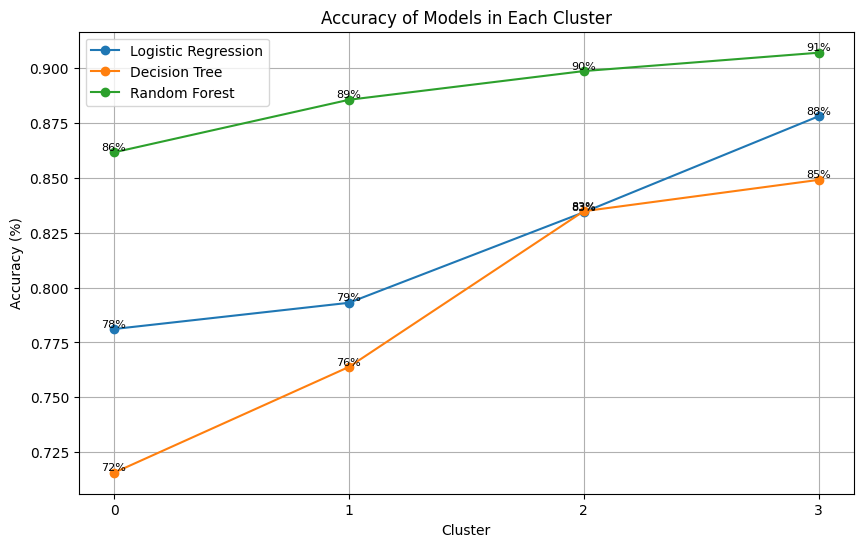

Best models and metrics saved for each cluster.


In [ ]:
import pickle
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Dictionary to store the best model and metrics for each cluster
best_models = {}

# Lists to store accuracies for each model in each cluster
logistic_accs = []
decision_tree_accs = []
random_forest_accs = []

# Iterate over each cluster
for cluster_num in sorted(X_Final_df['cluster_num'].unique()):
    if cluster_num != 10:
      # Filter data for the current cluster
      cluster_data = X_Final_df[X_Final_df['cluster_num'] == cluster_num]
      X_cluster = cluster_data.drop(columns=['cluster_num'])
      y_cluster = y_Final[X_Final_df.index.isin(cluster_data.index)]

      # Split the data into train and test sets
      X_train_clu, X_test_clu, y_train_clu, y_test_clu = train_test_split(X_cluster, y_cluster, test_size=0.2, random_state=42)

      # Train models (logistic regression, decision tree, random forest)
      models = {
          'Logistic Regression': LogisticRegression(max_iter=1000),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier()
      }

      best_auc = 0
      best_model = None
      best_acc = 0

      for model_name, model in models.items():
          # Train the model
          model.fit(X_train_clu, y_train_clu)

          # Predict probabilities
          y_prob = model.predict_proba(X_test_clu)[:, 1]

          # Calculate ROC AUC score
          auc = roc_auc_score(y_test_clu, y_prob)

          # Calculate accuracy
          y_pred = model.predict(X_test_clu)
          acc = accuracy_score(y_test_clu, y_pred)

          # Print evaluation metrics
          print(f"Cluster {cluster_num}, Model: {model_name}, ROC AUC: {auc}, Accuracy: {acc}")

          # Update the best model if current model has higher AUC
          if acc > best_acc:
              best_auc = auc
              best_model = model
              best_acc = acc

          # Append accuracy to the respective list
          if model_name == 'Logistic Regression':
              logistic_accs.append(acc)
          elif model_name == 'Decision Tree':
              decision_tree_accs.append(acc)
          elif model_name == 'Random Forest':
              random_forest_accs.append(acc)

      # Save the best model and metrics for the current cluster
      best_models[cluster_num] = {'model': best_model, 'roc_auc': best_auc, 'accuracy': best_acc}
      pickle.dump(best_models[cluster_num], open(f"best_model_metrics_cluster_{cluster_num}.pkl", "wb"))

# Plotting the accuracies for each model in each cluster
plt.figure(figsize=(10, 6))
plt.plot(sorted(logistic_accs), label='Logistic Regression', marker='o')
plt.plot(sorted(decision_tree_accs), label='Decision Tree', marker='o')
plt.plot(sorted(random_forest_accs), label='Random Forest', marker='o')
plt.xlabel('Cluster')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Models in Each Cluster')
plt.legend()
plt.xticks(range(len(X_Final_df['cluster_num'].unique())), sorted(X_Final_df['cluster_num'].unique()))
plt.grid(True)

# Add accuracy values as text on the graph
for i, acc in enumerate(sorted(logistic_accs)):
    plt.text(i, acc, f'{acc:.0%}', ha='center', va='bottom', fontsize=8)
for i, acc in enumerate(sorted(decision_tree_accs)):
    plt.text(i, acc, f'{acc:.0%}', ha='center', va='bottom', fontsize=8)
for i, acc in enumerate(sorted(random_forest_accs)):
    plt.text(i, acc, f'{acc:.0%}', ha='center', va='bottom', fontsize=8)

plt.show()

print("Best models and metrics saved for each cluster.")
